<a href="https://colab.research.google.com/github/umiSirya/MachineLearning-1/blob/main/CreditRiskModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries and Data Import**



In [45]:
# General Libraries

import warnings
warnings.filterwarnings('ignore')

# Data Explotation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #Visualization
import seaborn as sns #Advanced Visualization
import missingno as msno #Missing data visualization
%matplotlib inline

# Data Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score



# Data Splitting
from sklearn.model_selection import train_test_split


# Data modelling libraries
from sklearn.impute import SimpleImputer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score

In [52]:
#Loading data
df = pd.read_csv("/content/raw-data.csv")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


# **EDA and Data Cleaning**

In [49]:
#Renaming columns in the dataset with their correct names
df_renamed = df.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI',
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler',
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
df_renamed.head(2)

,Time,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,...,Max amount sanctioned in the Live loans,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [50]:
df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37722 entries, 0 to 37721
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Time                                                            37722 non-null  int64  
 1   Customer ID                                                     37722 non-null  float64
 2   Customer has bounced in first EMI                               37722 non-null  float64
 3   No of times bounced 12 months                                   37722 non-null  float64
 4   Maximum MOB                                                     37722 non-null  float64
 5   No of times bounced while repaying the loan                     37722 non-null  float64
 6   EMI                                                             37722 non-null  float64
 7   Loan Amount                                      

In [28]:
df_renamed.describe()

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,No of advance EMI paid,...,No of new loans in last 3 months,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
count,119528.000000,119528.000000,119528.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,85048.000000,...,119528.0,1.928100e+04,1.902800e+04,104467.000000,13431.000000,20433.000000,119528.000000,119528.000000,119528.000000,119528.000000
mean,59764.500000,0.028378,0.473061,17.217148,0.690857,2325.701298,39338.081648,21.060048,3512.692233,0.643930,...,0.0,4.302522e+05,1.766494e+05,41415.210047,46.980940,48.208976,1.076877,0.823991,0.344898,0.021869
std,34504.905825,0.166052,0.859042,5.203209,1.091658,575.614365,11016.619745,5.698900,3754.675342,0.969123,...,0.0,8.228143e+05,4.075618e+05,13044.008078,42.716225,41.713826,3.737882,3.172612,1.478180,0.146258
min,1.000000,0.000000,0.000000,2.000000,0.000000,681.000000,10000.000000,6.000000,1001.000000,0.000000,...,0.0,9.900000e+01,1.000000e+00,10000.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,29882.750000,0.000000,0.000000,14.000000,0.000000,1895.000000,30000.000000,18.000000,1368.000000,0.000000,...,0.0,4.490000e+04,3.394050e+04,31000.000000,20.000000,23.000000,0.000000,0.000000,0.000000,0.000000
50%,59764.500000,0.000000,0.000000,17.000000,0.000000,2320.000000,39700.000000,24.000000,2307.000000,0.000000,...,0.0,1.100000e+05,8.800000e+04,42250.000000,31.000000,35.000000,0.000000,0.000000,0.000000,0.000000
75%,89646.250000,0.000000,1.000000,21.000000,1.000000,2689.000000,48000.000000,24.000000,3911.000000,1.000000,...,0.0,4.920000e+05,2.000048e+05,49300.000000,52.000000,55.000000,0.000000,0.000000,0.000000,0.000000
max,119528.000000,1.000000,12.000000,36.000000,29.000000,7840.000000,96000.000000,36.000000,21106.000000,6.000000,...,0.0,2.022777e+07,3.000000e+07,700000.000000,252.000000,268.000000,314.000000,243.000000,96.000000,1.000000


<Axes: >

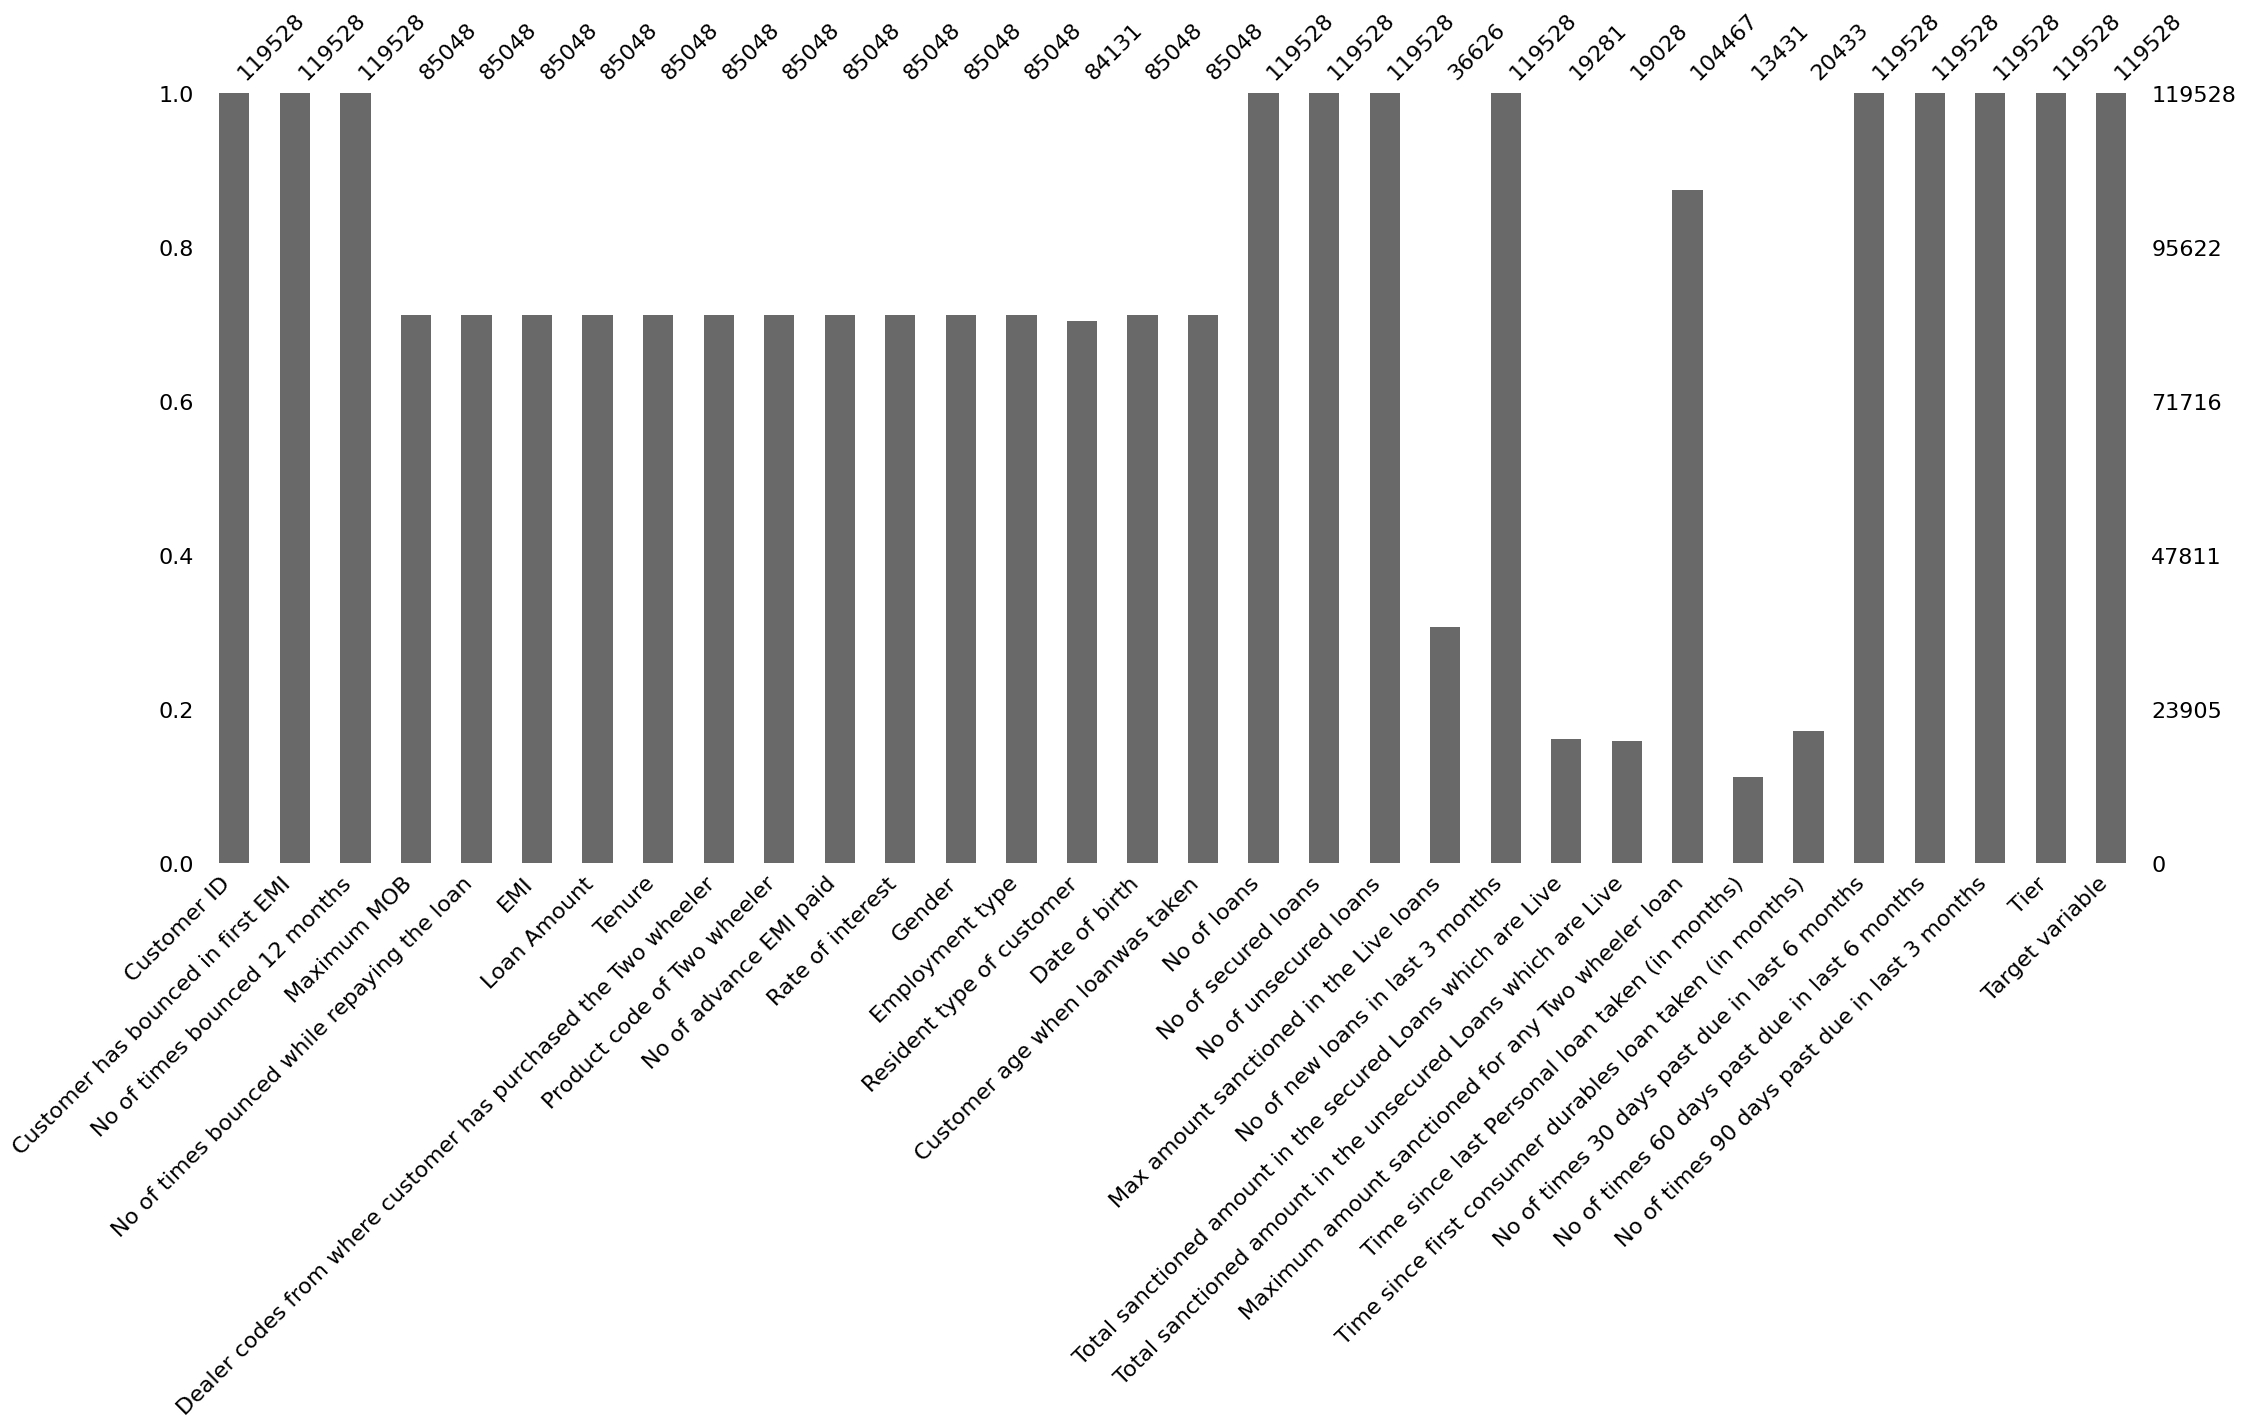

In [29]:
# Visual representation of missing data
msno.bar(df_renamed)

In [30]:
#Removing irrelevant columns
irrelevant_columns = ['Customer ID','Dealer codes from where customer has purchased the Two wheeler', 'Product code of Two wheeler','Date of birth','Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)','Gender', 'No of new loans in last 3 months']
Loan_renamed = df_renamed.drop(irrelevant_columns, axis=1)


In [31]:
# find columns with categorical data
categorical_columns = df_renamed.select_dtypes(include=['object']).columns
categorical_columns


Index(['Employment type', 'Resident type of customer', 'Tier'], dtype='object')

In [32]:
#duplicated rows
df_renamed.duplicated().sum()

#drop duplicated rows
df_renamed = df_renamed.drop_duplicates()

**Dealing with Missing Values**

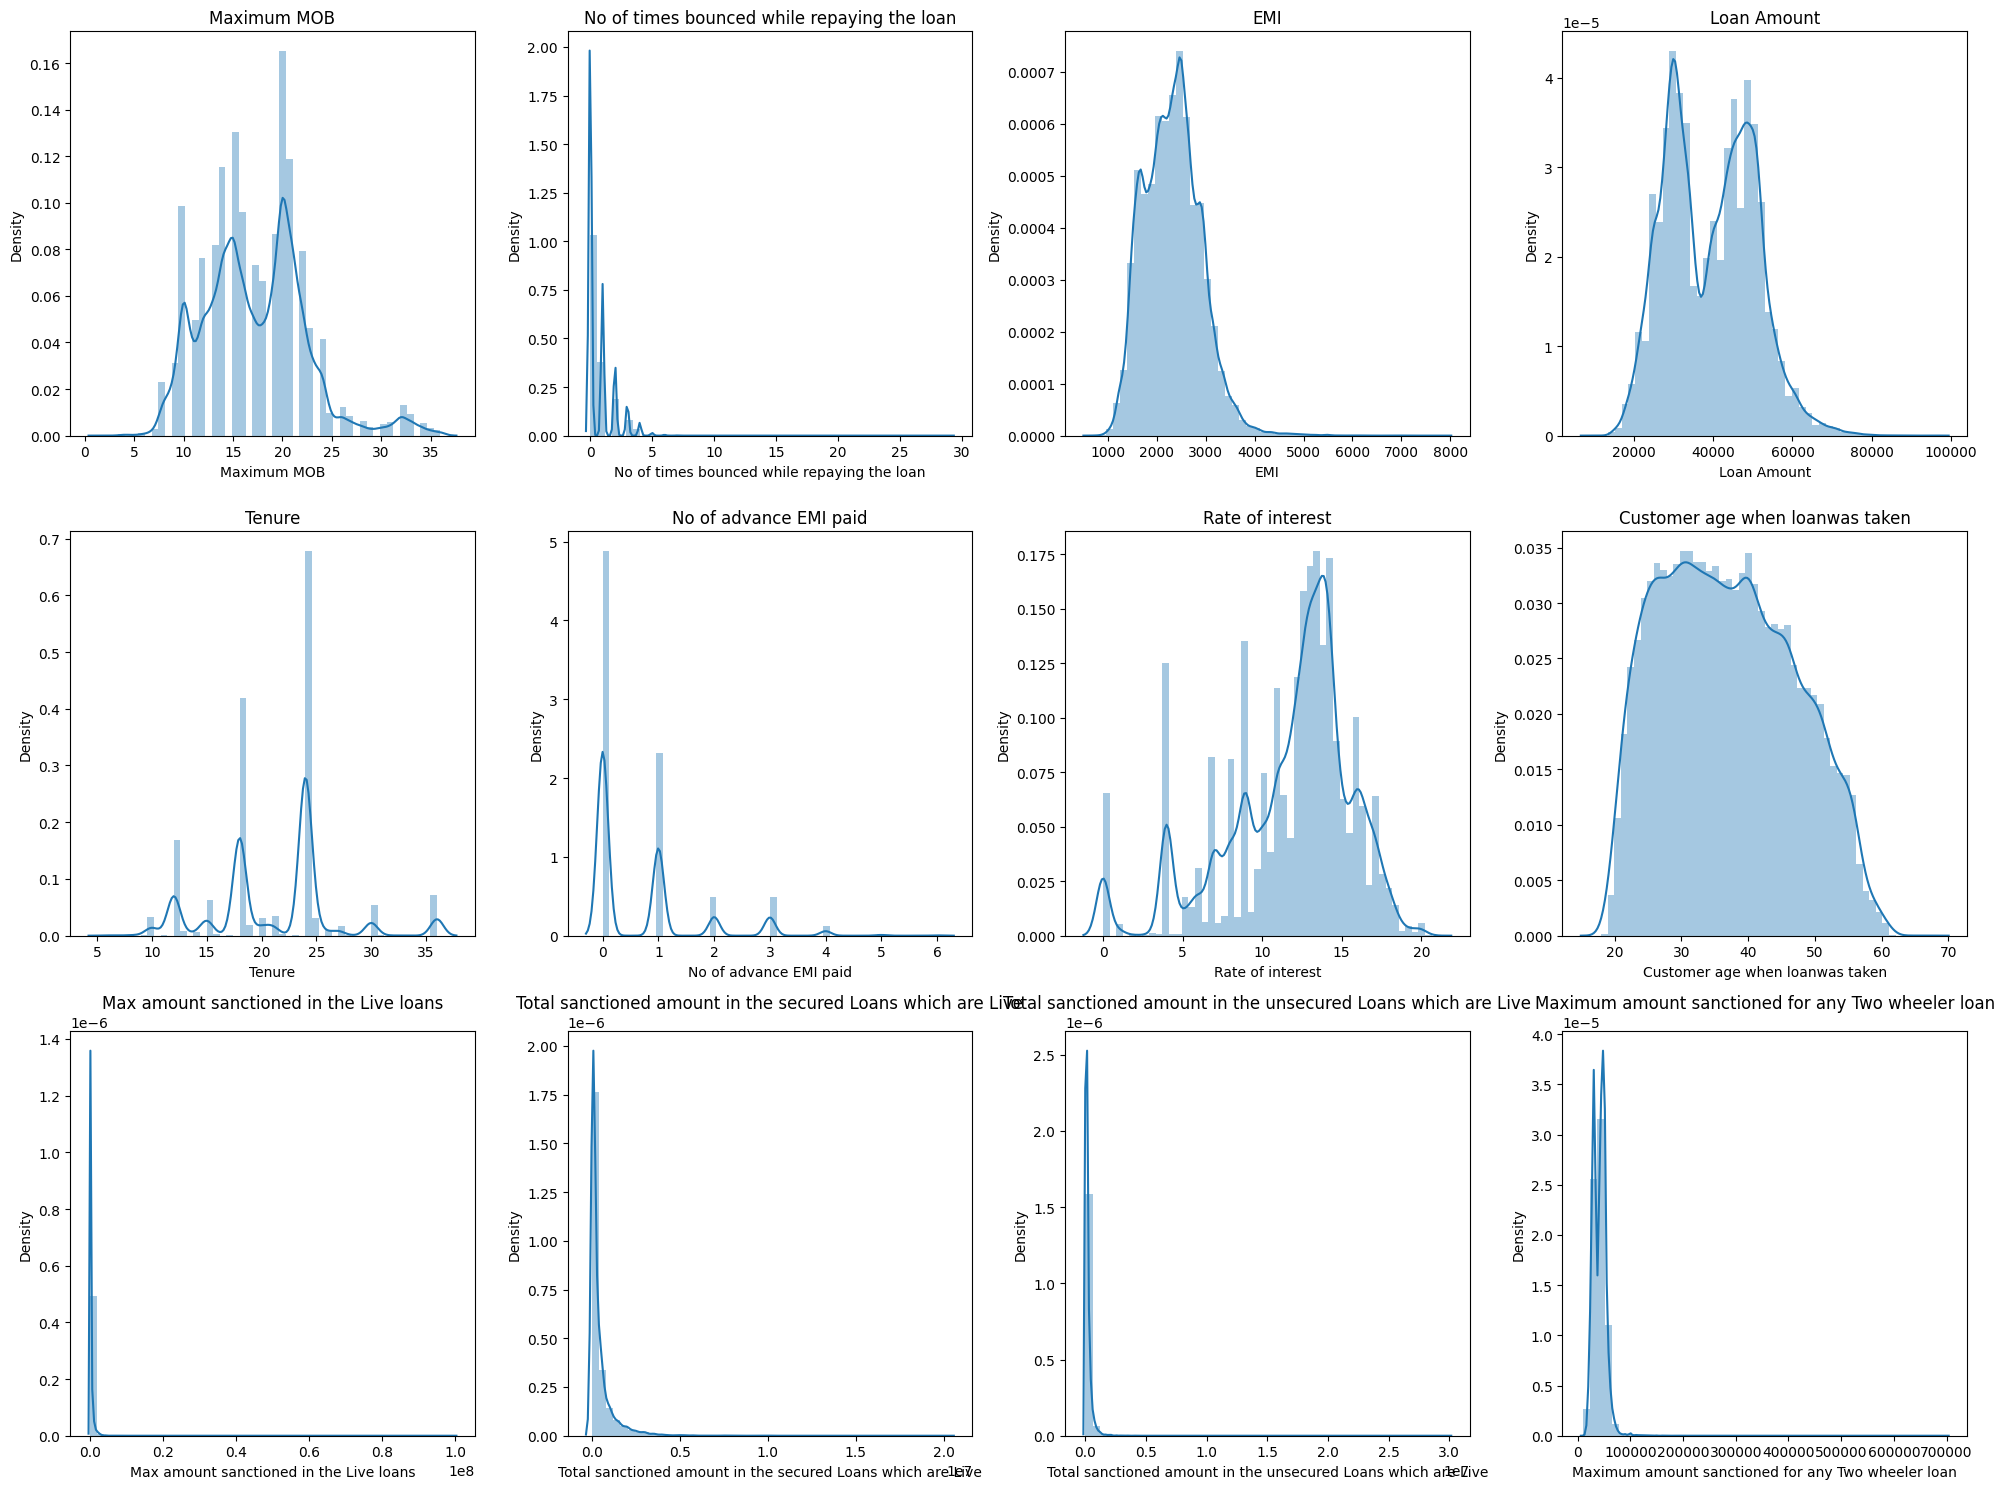

In [33]:

# Distribution graph of numerical columns
col = ['Maximum MOB', 'No of times bounced while repaying the loan', 'EMI',
       'Loan Amount', 'Tenure', 'No of advance EMI paid', 'Rate of interest',
       'Customer age when loanwas taken', 'Max amount sanctioned in the Live loans', 'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan',
       ]
# distribution graphs for above columns
num_cols = 4 # Set up a grid with 4 columns per row
num_rows = (len(col) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

for idx, column in enumerate(col):
    sns.distplot(Loan_renamed[column], ax=axes[idx])  # Plot each column in the grid
    axes[idx].set_title(column)

for ax in axes[len(col):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [34]:
# filling null values with mean
mean = ['EMI','Loan Amount','Customer age when loanwas taken']
for column in mean:
    Loan_renamed[column] = Loan_renamed[column].fillna(df_renamed[column].mean())

# filling null values with median
normalize = ['Maximum MOB', 'Tenure', 'No of advance EMI paid','Rate of interest', 'Max amount sanctioned in the Live loans', 'Total sanctioned amount in the unsecured Loans which are Live' , 'Total sanctioned amount in the secured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan','No of times bounced while repaying the loan']
for column in normalize:
    df_renamed[column] = df_renamed[column].fillna(df_renamed[column].median())

# filling null values with mode
mode =['Employment type', 'Resident type of customer', 'Tier']
for column in mode:
    df_renamed[column] = df_renamed[column].fillna(df_renamed[column].mode()[0])



<Axes: >

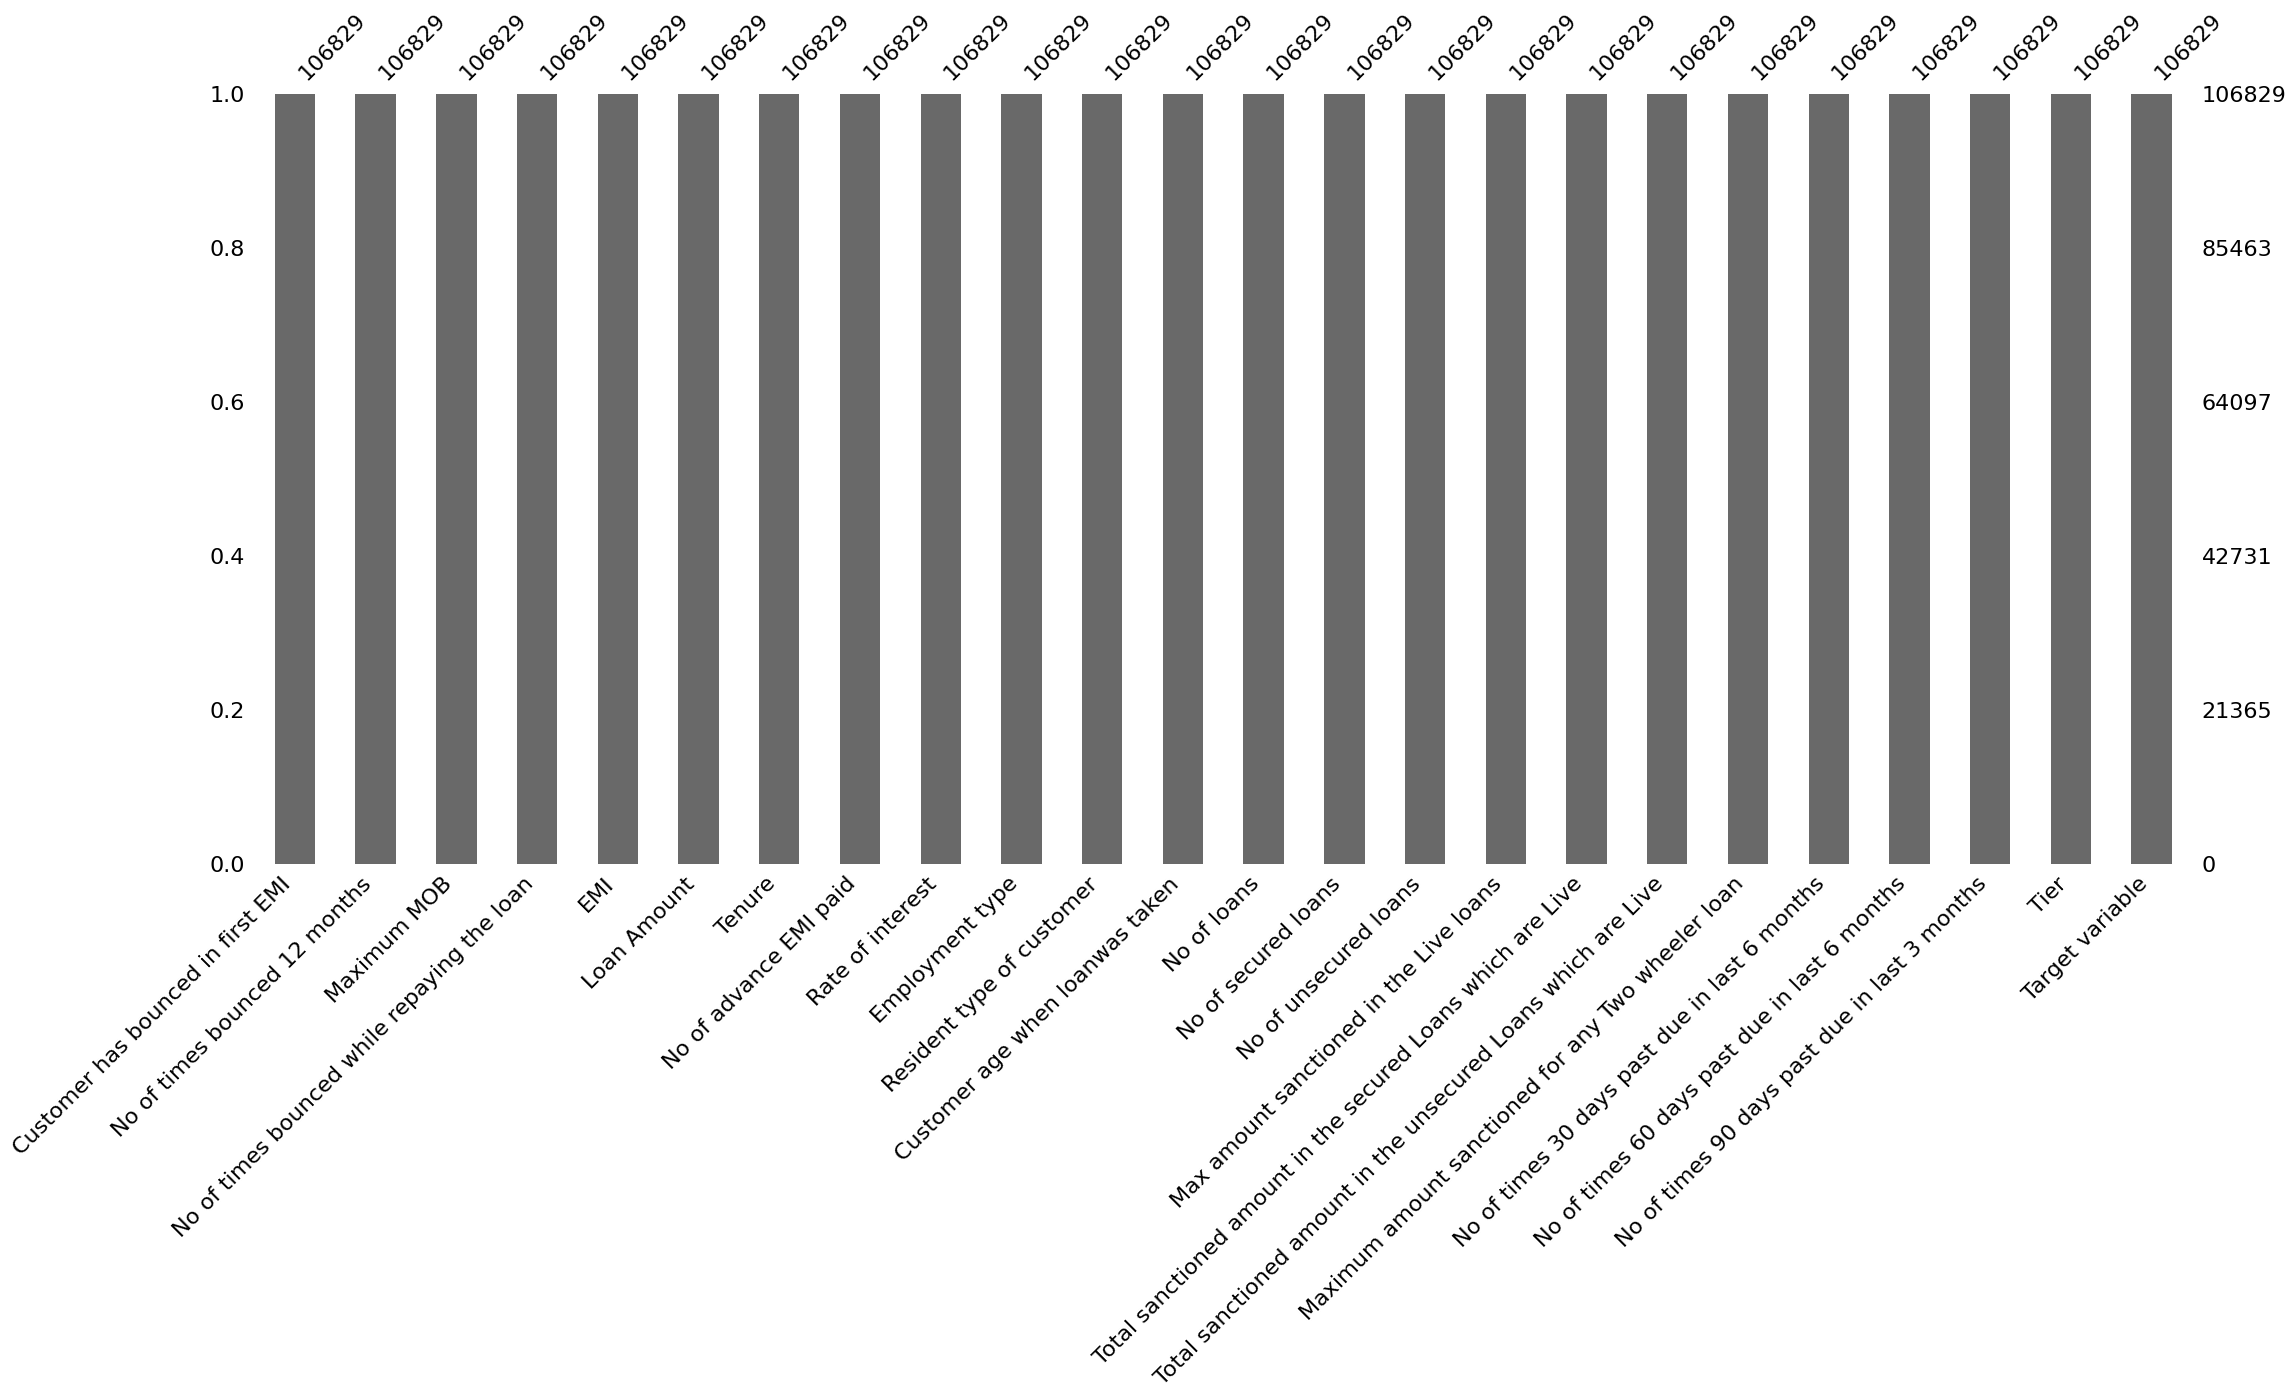

In [35]:
msno.bar(Loan_renamed)

**Encoding Categorical columns**

In [36]:
# using label encoding for categorical columns
label =['Employment type', 'Resident type of customer', 'Tier']

le = LabelEncoder()
for column in label:
    df_renamed[column] = le.fit_transform(df_renamed[column])




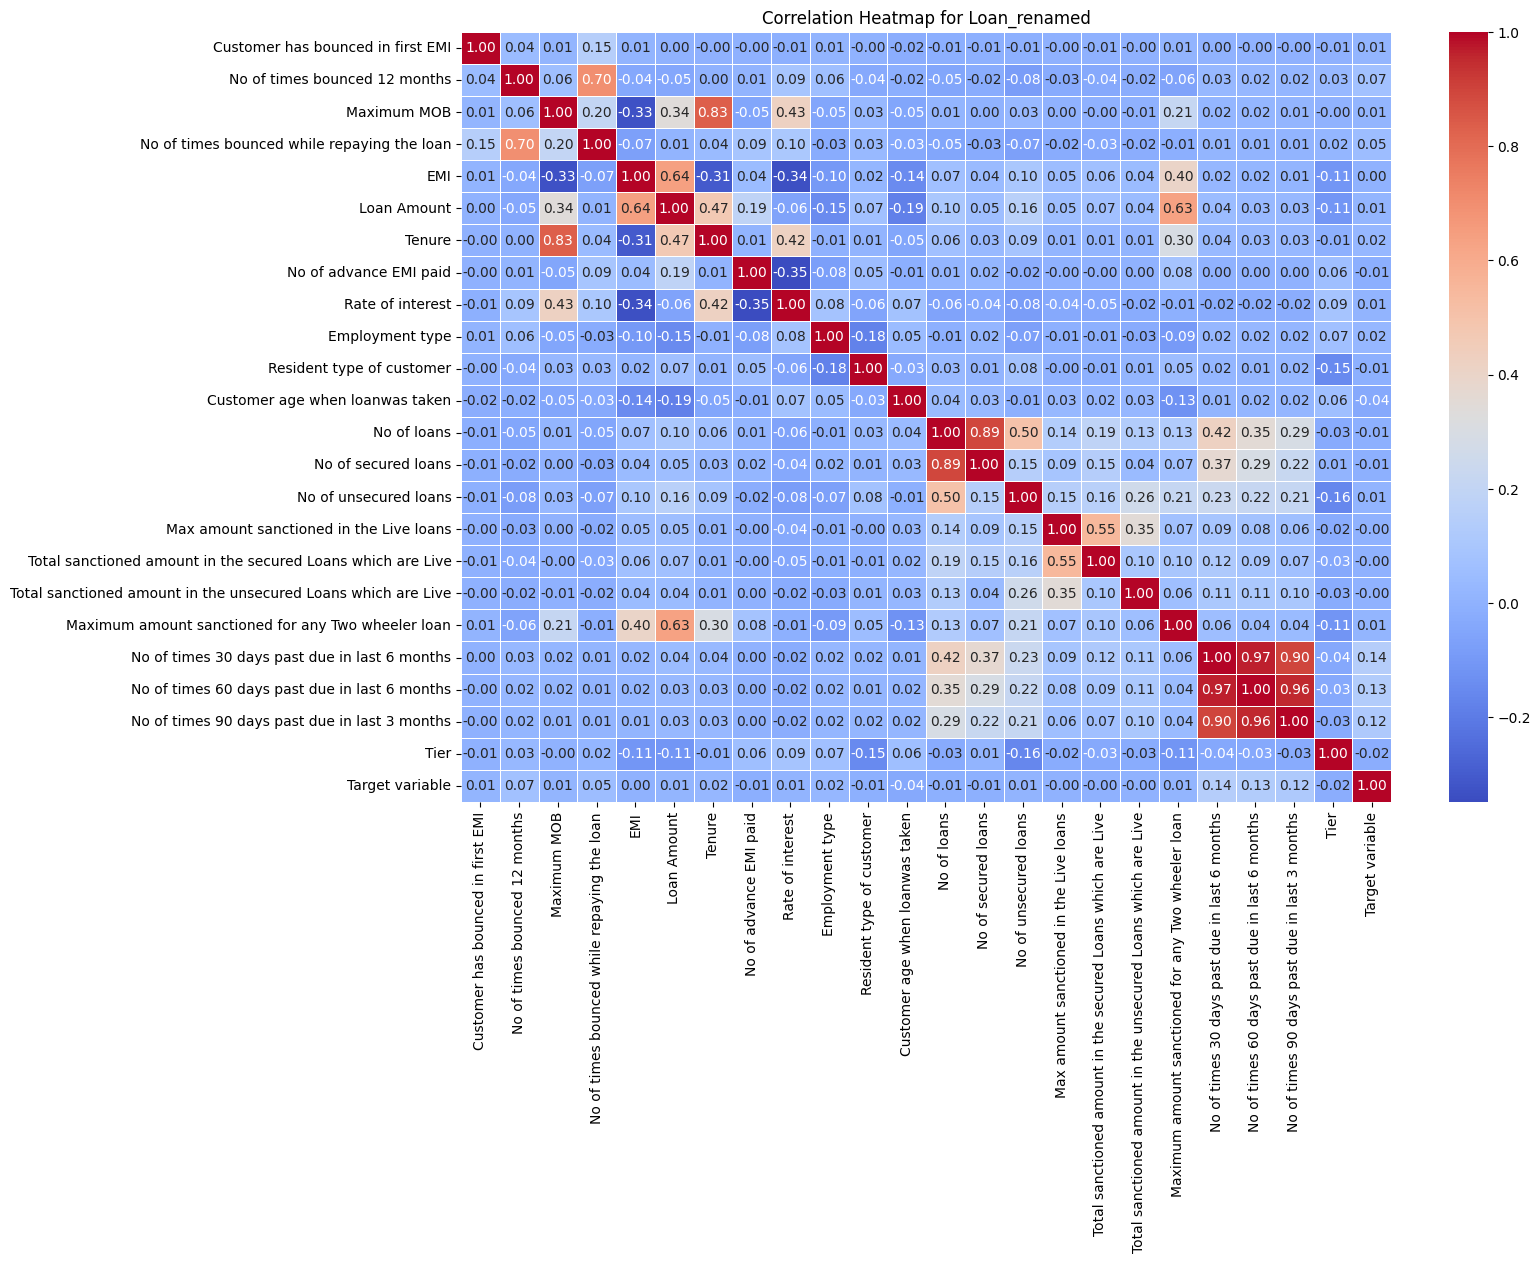

In [37]:
#correlation heatmap for df Loan_renamed
corrmat = df_renamed.corr()

plt.figure(figsize=(15, 10))  # You can adjust the size as per your preference
sns.heatmap(corrmat, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap for Loan_renamed')
plt.show()

**Scaling the columns**

In [38]:
# filling null values with standardization
standard = ['EMI','Loan Amount','Customer age when loanwas taken']
for column in standard:
    df_renamed[column] = (df_renamed[column] - df_renamed[column].mean()) / df_renamed[column].std()

# filling null values with normalization
normalize = ['Maximum MOB', 'Tenure', 'No of advance EMI paid']
for column in normalize:
    df_renamed[column] = (df_renamed[column] - df_renamed[column].min()) / (df_renamed[column].max() - df_renamed[column].min())

# filling null values with robust scaling
robust= ['Rate of interest','Max amount sanctioned in the Live loans','Total sanctioned amount in the unsecured Loans which are Live','Total sanctioned amount in the secured Loans which are Live','Maximum amount sanctioned for any Two wheeler loan','No of times bounced while repaying the loan']
for column in robust:
    df_renamed[column] = (df_renamed[column] - df_renamed[column].median()) / (np.percentile(df_renamed[column], 75) - np.percentile(df_renamed[column], 25))




# Split the Data into X and Y training sets

In [39]:
# Split into training and testing sets
X = df_renamed.drop(columns=['Target variable'])
y = df_renamed['Target variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train and Test Set Sizes:")
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

Train and Test Set Sizes:
X_train: (74780, 23) y_train: (74780,)
X_test: (32049, 23) y_test: (32049,)


# **Modeling**





In [42]:

# Replace infinite values with a large finite value
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Replace NaN values with the column mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error/ RMSE/ R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Performance Metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Mean Squared Error: 0.0245873506193641
Root Mean Squared Error: 0.1568035414758356
R-squared: -0.08006032179321054
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     31302
           1       0.21      0.02      0.04       747

    accuracy                           0.98     32049
   macro avg       0.59      0.51      0.51     32049
weighted avg       0.96      0.98      0.97     32049

Confusion Matrix:
 [[31246    56]
 [  732    15]]
